<a href="https://colab.research.google.com/github/MOISECHRIST/Tensorflow_DeepLearn_Course/blob/main/Tensorflow_Neural_Network_Fashion_MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dans ce projet nous allons parcourir les notions fondamentale du deeplearning avec tensorflow. Pour cette exercice, nous contruirons un modèle de classification des images issus du dataset fashion mnist.

Import Library

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense

import numpy as np

Import Data

In [2]:
data = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
X_train, y_train = data[0]
X_test, y_test = data[1]

In [4]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

Data Vizualisation

In [6]:
import matplotlib.pyplot as plt

In [7]:
img_id = np.random.choice(60000, 10)

In [8]:
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

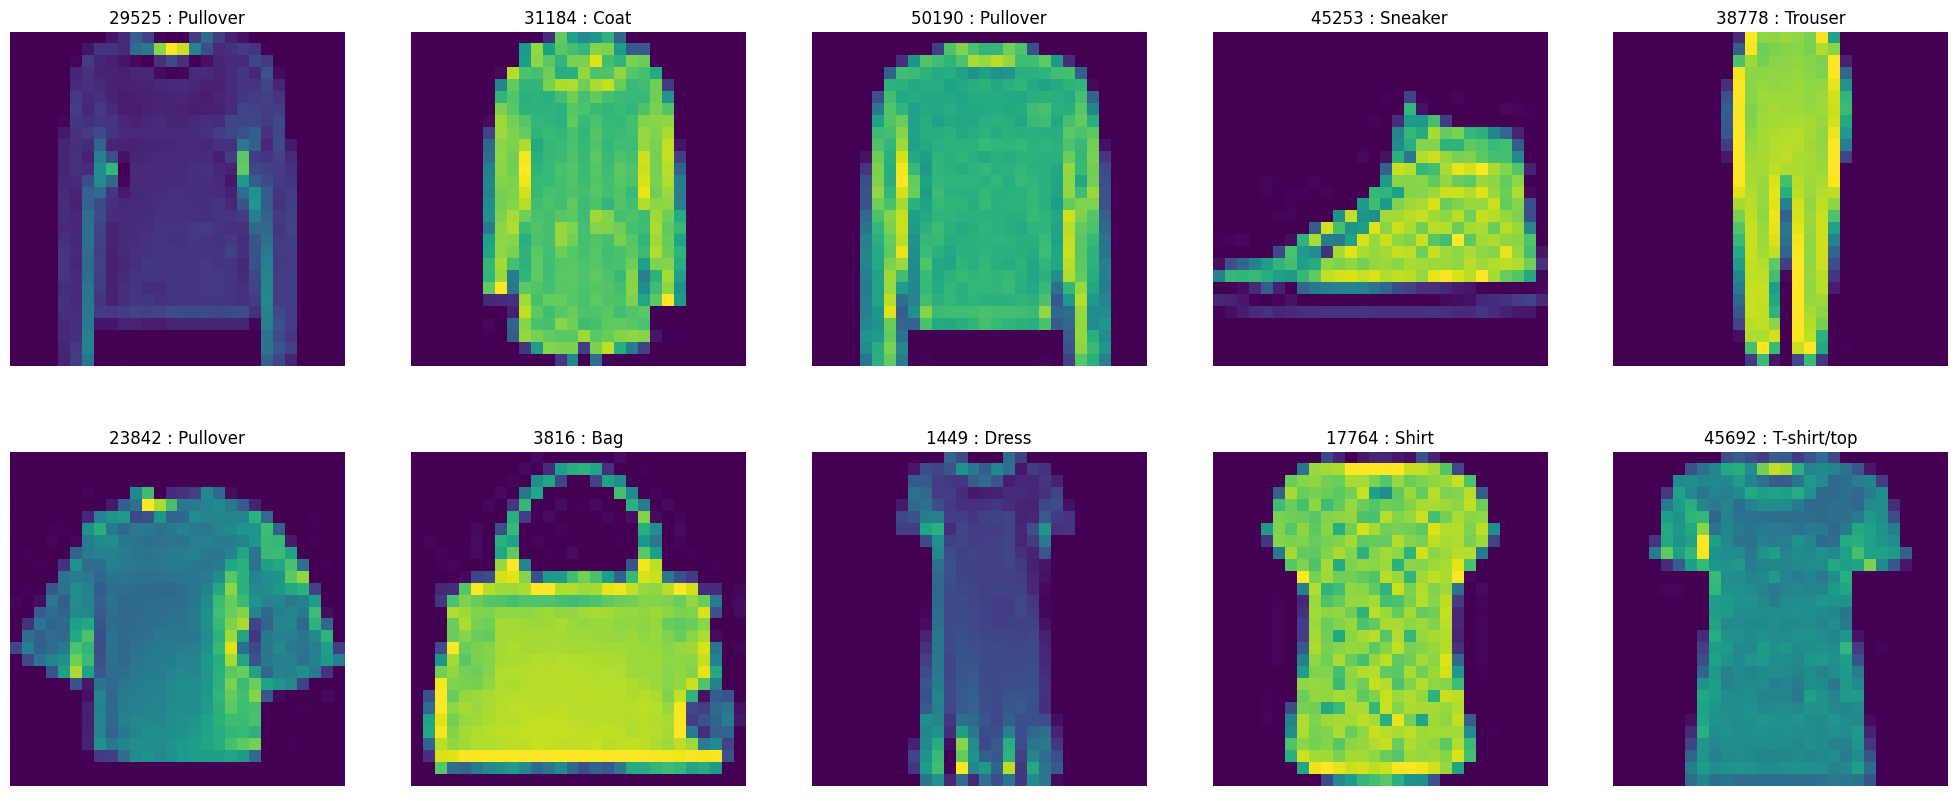

In [9]:
plt.figure(figsize=(25, 10))
for i, img in enumerate(img_id):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[img])
    plt.axis('off')
    plt.title(f"{img} : {labels[y_train[img]]}")

Inputs Data Processing

Le traitement des images ici consistera à les normaliser (entre 0 et 1) puis à les formater de matrice de pixels à vecteurs.

In [10]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [11]:
Flatten_X_train = X_train.reshape(60000, 784)
Flatten_X_test = X_test.reshape(10000, 784)

Outcome Processing

Pour ce qui est des labels, nous allons effectuer le One Hot Encoding qui consiste à avoir un vecteur de 10 elements sous à 0 sauf un seuls.

In [12]:
from sklearn.preprocessing import OneHotEncoder

In [13]:
enc = OneHotEncoder()
ho_y_train = enc.fit_transform(y_train.reshape(60000,1))
hot_y_train = ho_y_train.toarray()

In [14]:
ho_y_train.shape

(60000, 10)

In [15]:
ho_y_test = enc.transform(y_test.reshape(10000,1))
hot_y_test = ho_y_test.toarray()

In [16]:
ho_y_test.shape

(10000, 10)

In [17]:
y_train[0], hot_y_train[0]

(9, array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]))

In [18]:
y_test[0], hot_y_test[0]

(9, array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]))

Model Configuration

In [19]:
model = Sequential()

In [20]:
model.add(Dense(units=784, activation='sigmoid', input_shape=(Flatten_X_train.shape[1],)))
model.add(Dense(units=10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 623,290 (2.38 MB)

 Trainable params: 623,290 (2.38 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

Model Training

In [23]:
model.fit(Flatten_X_train,
          hot_y_train,
          epochs=20,
          batch_size=100)

Epoch 1/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4714 - loss: 1.8854
Epoch 2/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7122 - loss: 1.0685
Epoch 3/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7367 - loss: 0.8606
Epoch 4/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7489 - loss: 0.7712
Epoch 5/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7616 - loss: 0.7075
Epoch 6/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7668 - loss: 0.6797
Epoch 7/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7786 - loss: 0.6460
Epoch 8/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7865 - loss: 0.6239
Epoch 9/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7930 - loss: 0.6031
Epoch 10/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7948 - loss: 0.5919
Epoch 11/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8015 - loss: 0.5755
Epoch 12/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [24]:
metrics=model.history.history

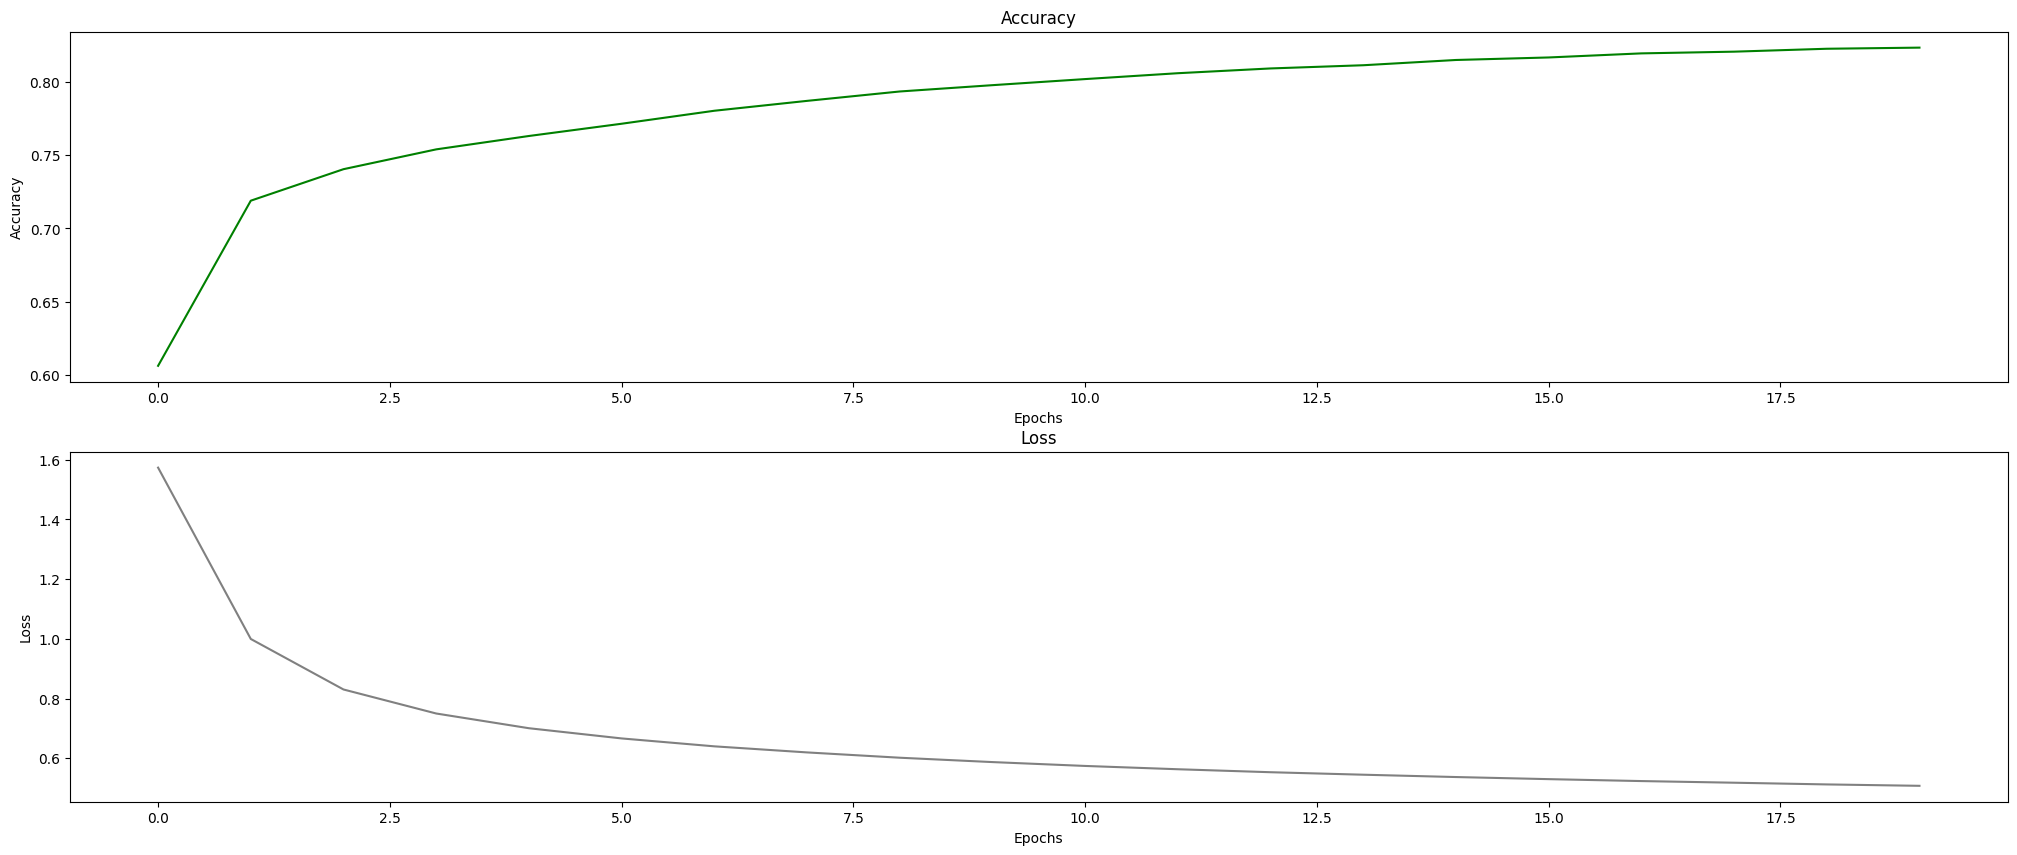

In [25]:
plt.figure(figsize=(25,10))
#Plot Accuracy
plt.subplot(2,1,1)
plt.plot(metrics['accuracy'], color='green')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')


#Plot Loss
plt.subplot(2,1,2)
plt.plot(metrics['loss'], color='grey')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')


plt.show()

Model Evaluation

In [26]:
y_pred = model.predict(Flatten_X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


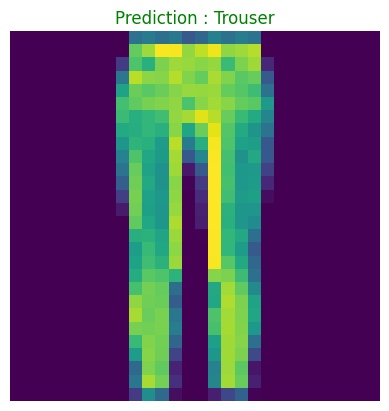

In [27]:
img = np.random.choice(10000)
plt.imshow(X_test[img])
plt.axis('off')
plt.title(f"Prediction : {labels[np.argmax(y_pred[img])]}", color='green' if np.argmax(y_pred[img])==y_test[img] else 'red')
plt.show()

In [28]:
y_pred_labels = np.array([labels[np.argmax(i)] for i in y_pred])
y_test_labels = np.array([labels[i] for i in y_test])

In [29]:
print(f"Test's accuracy : {100*np.sum(y_pred_labels==y_test_labels)/len(y_pred_labels):.3f} %")

Test's accuracy : 81.170 %


In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [31]:
cm = confusion_matrix(y_test_labels, y_pred_labels)

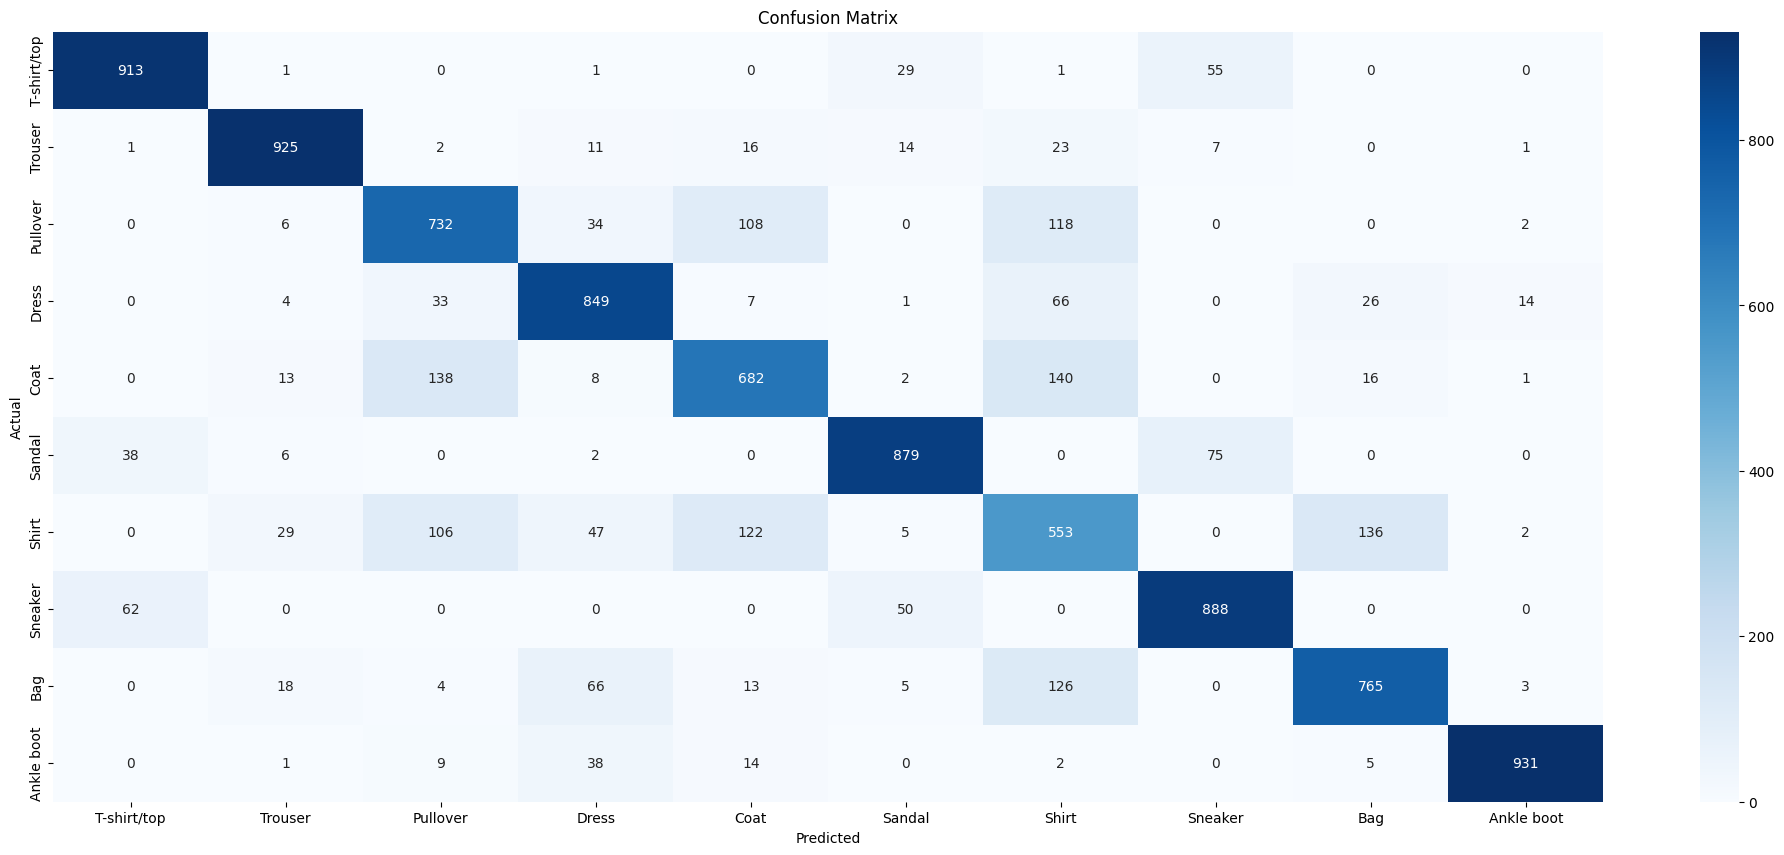

In [32]:
plt.figure(figsize=(25,10))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [33]:
from joblib import dump

In [34]:
dump(model, 'model_sigmoid_fashion_mnist_tf_neural_network.joblib')

['model_fashion_mnist_tf_neural_network.joblib']

In [35]:
model2 = Sequential()

In [36]:
model2.add(Dense(units=784, activation='relu', input_shape=(Flatten_X_train.shape[1],)))
model2.add(Dense(units=10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 623,292 (2.38 MB)

 Trainable params: 623,290 (2.38 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [38]:
model2.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
model2.fit(Flatten_X_train,
          hot_y_train,
          epochs=20,
          batch_size=100)

Epoch 1/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6280 - loss: 1.2502
Epoch 2/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7964 - loss: 0.6392
Epoch 3/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8196 - loss: 0.5516
Epoch 4/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8286 - loss: 0.5139
Epoch 5/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8350 - loss: 0.4911
Epoch 6/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8428 - loss: 0.4690
Epoch 7/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8448 - loss: 0.4560
Epoch 8/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8483 - loss: 0.4444
Epoch 9/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8501 - loss: 0.4397
Epoch 10/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8536 - loss: 0.4306
Epoch 11/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8541 - loss: 0.4221
Epoch 12/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [40]:
metrics2=model2.history.history

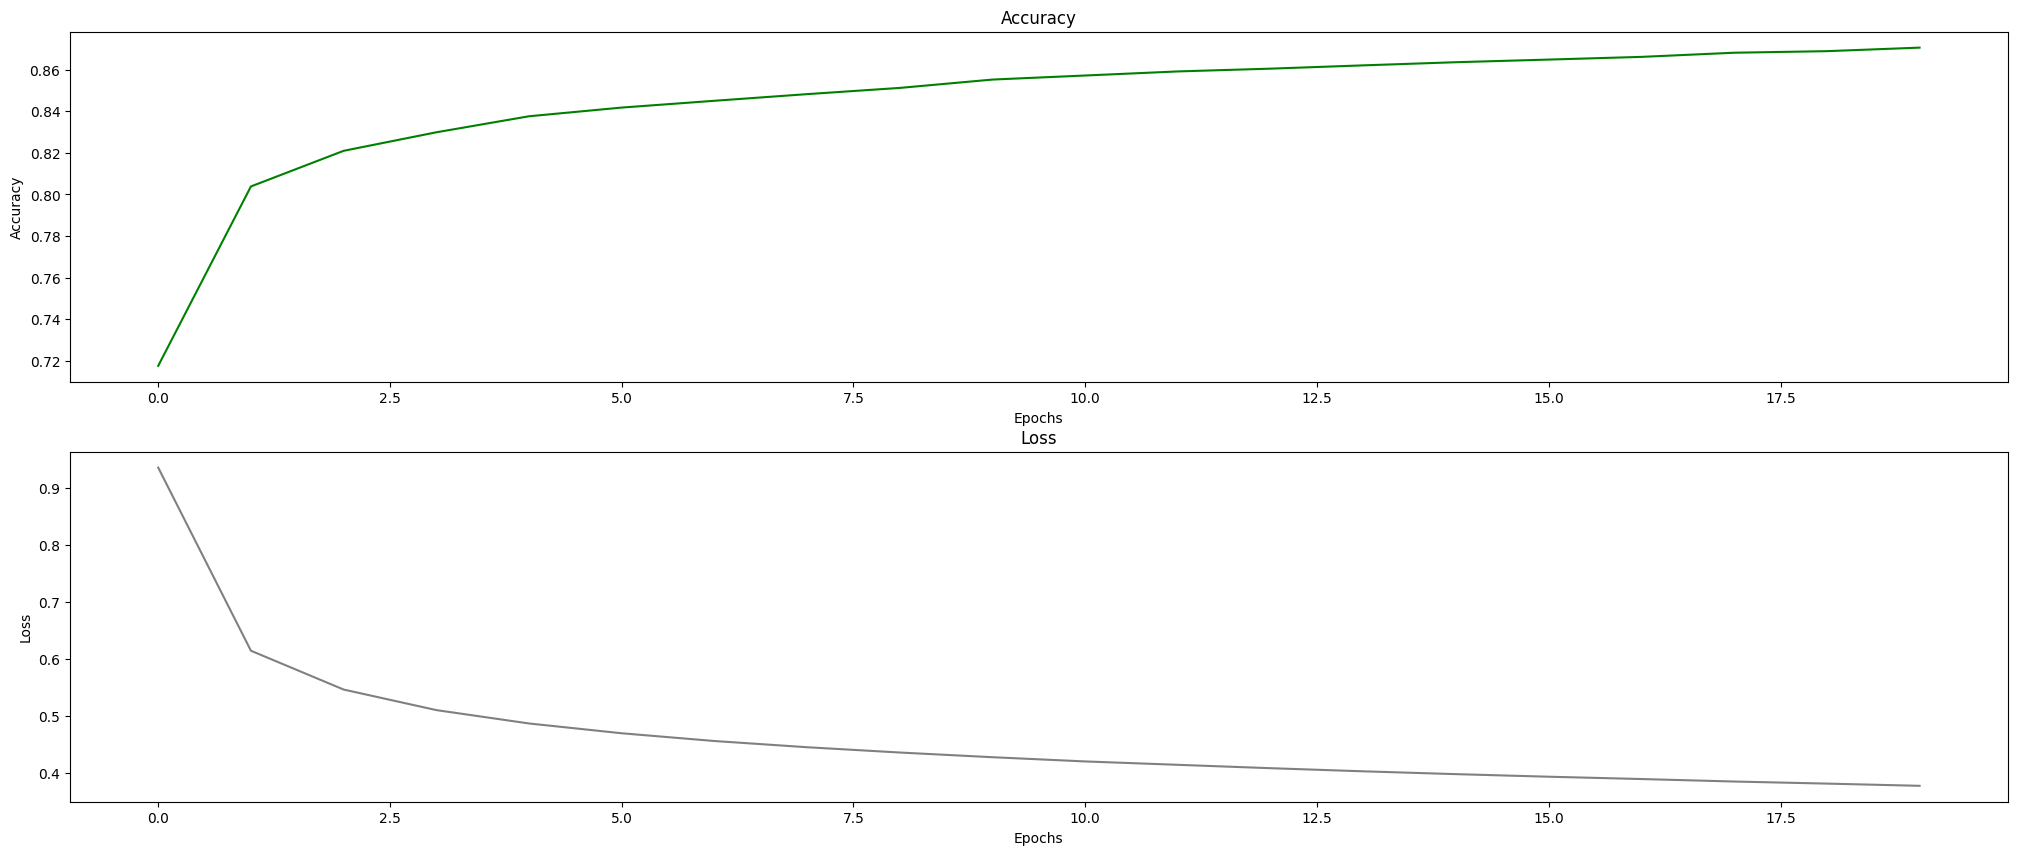

In [41]:
plt.figure(figsize=(25,10))
#Plot Accuracy
plt.subplot(2,1,1)
plt.plot(metrics2['accuracy'], color='green')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')


#Plot Loss
plt.subplot(2,1,2)
plt.plot(metrics2['loss'], color='grey')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')


plt.show()

In [42]:
y_pred2 = model2.predict(Flatten_X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


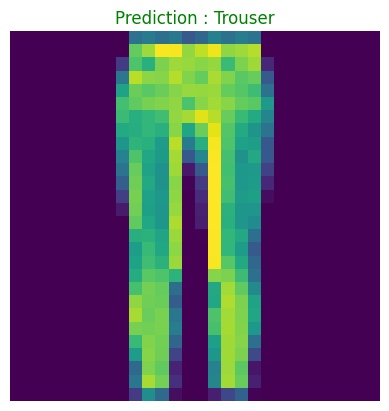

In [43]:
plt.imshow(X_test[img])
plt.axis('off')
plt.title(f"Prediction : {labels[np.argmax(y_pred2[img])]}", color='green' if np.argmax(y_pred2[img])==y_test[img] else 'red')
plt.show()

In [44]:
y_pred2_labels = np.array([labels[np.argmax(i)] for i in y_pred2])

In [45]:
print(f"Test's accuracy : {100*np.sum(y_pred2_labels==y_test_labels)/len(y_pred2_labels):.3f} %")

Test's accuracy : 85.100 %


In [46]:
cm2 = confusion_matrix(y_test_labels, y_pred2_labels)

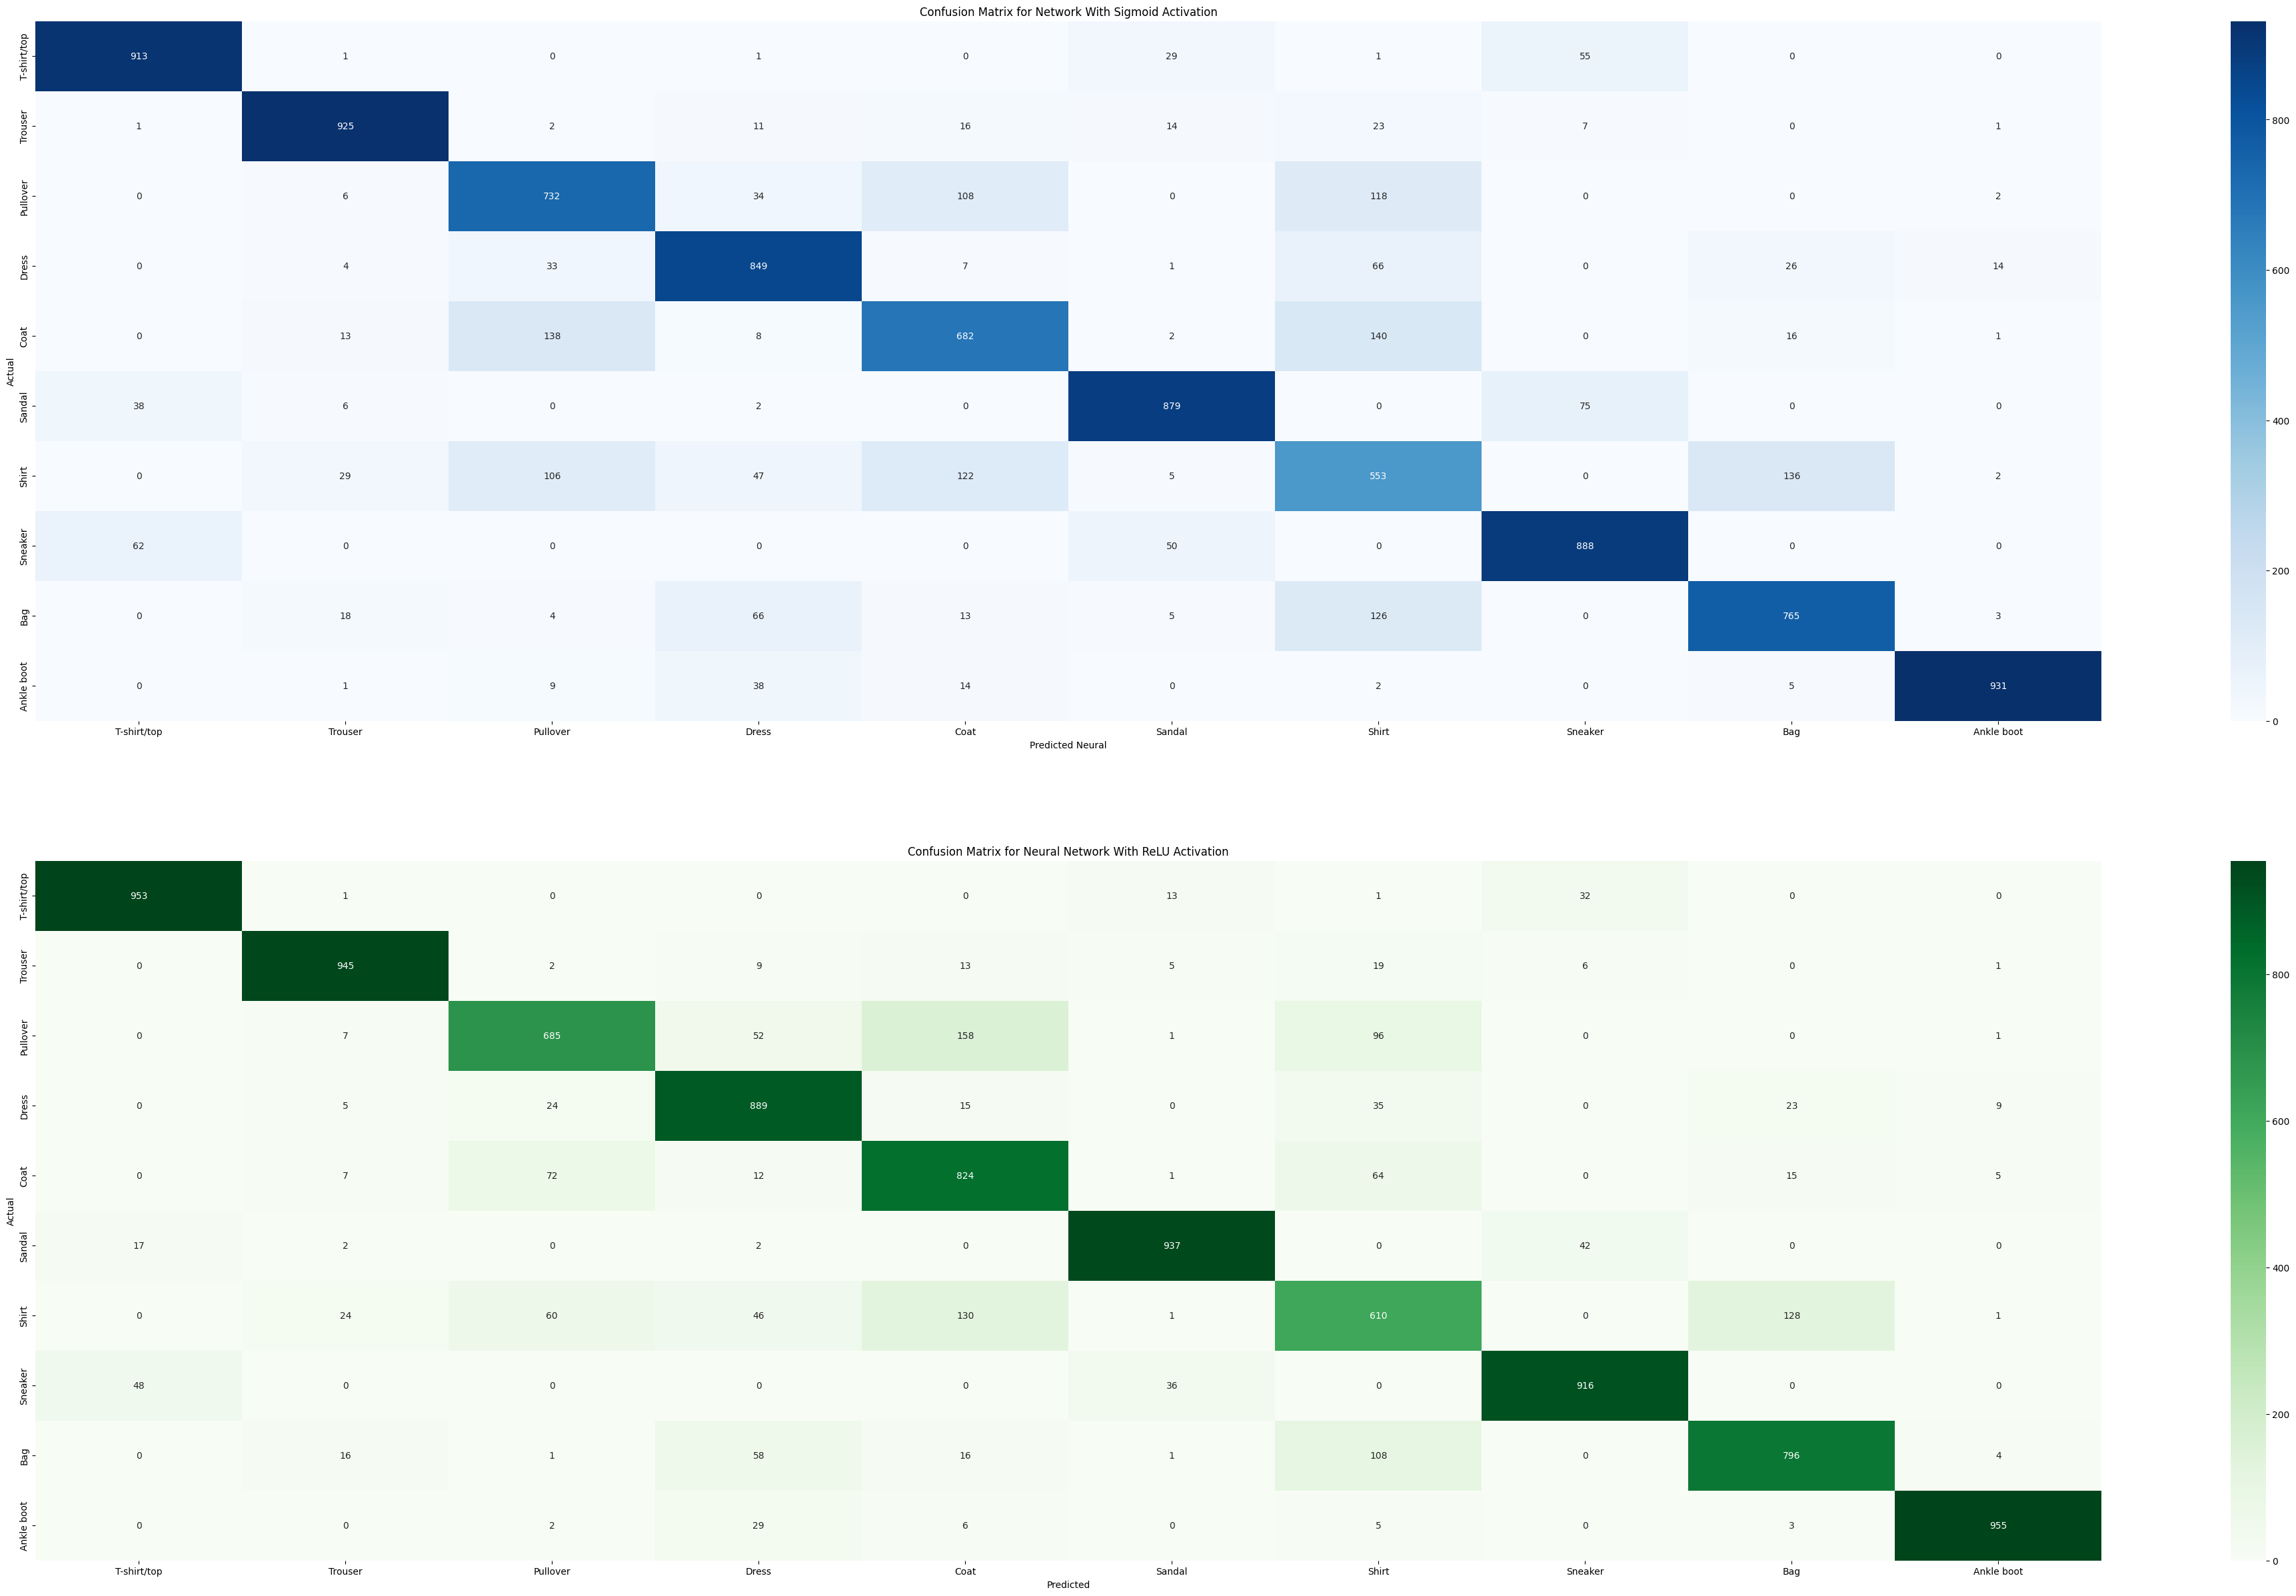

In [47]:
plt.figure(figsize=(50,30))
plt.subplot(2,1,1)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Neural')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Network With Sigmoid Activation')

plt.subplot(2,1,2)
sns.heatmap(cm2, annot=True, cmap='Greens',fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Neural Network With ReLU Activation')
plt.show()

In [48]:
dump(model, 'model_relu_fashion_mnist_tf_neural_network.joblib')

['model_relu_fashion_mnist_tf_neural_network.joblib']

In [49]:
import pandas as pd

In [50]:
def compute_metrics(conf_mat, labels):
  sum_col=[]
  sum_line=[]
  df=[]
  for index in range(conf_mat.shape[0]):
    sum_col.append(np.sum(cm[:,index]))
    sum_line.append(np.sum(cm[index,:]))


  for index in range(cm.shape[0]):
      res=dict()
      precision=cm[index,index]/sum_col[index]
      rappel=cm[index,index]/sum_line[index]
      f1score = 1/((1/2)*((1/precision)+(1/rappel)))
      res["Precision"]=float(precision)
      res["Rappel"]=float(rappel)
      res["F1Score"]=float(f1score)
      res["Classe"]=labels[index]
      df.append(res)
  return pd.DataFrame(df)

In [51]:
metrics_cm=compute_metrics(cm, labels)
metrics_cm2=compute_metrics(cm2, labels)

In [52]:
def plot_metrics(df):
  FIG_SIZE=[25,20]
  plt.figure(figsize=FIG_SIZE)
  plt.subplot(3,1,1)
  # Création du barplot
  barplot = sns.barplot(data=df, y='Precision', x=df.index, color='slategray')
  plt.xlabel('Classe')
  # Ajout des annotations
  for p in barplot.patches:
      barplot.annotate(format(p.get_height(), '.2f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0, 9),
                      textcoords = 'offset points')
  barplot.set_xticklabels(labels)

  plt.subplot(3,1,2)

  # Création du barplot
  barplot = sns.barplot(data=df,y='Rappel', x=df.index,color='slategray')
  plt.xlabel('Classe')
  # Ajout des annotations
  for p in barplot.patches:
      barplot.annotate(format(p.get_height(), '.2f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0, 9),
                      textcoords = 'offset points')
  barplot.set_xticklabels(labels)
  plt.subplot(3,1,3)
  # Création du barplot
  barplot = sns.barplot(data=df,y='F1Score', x=df.index,color='slategray')
  plt.xlabel('Classe')
  # Ajout des annotations
  for p in barplot.patches:
      barplot.annotate(format(p.get_height(), '.2f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0, 9),
                      textcoords = 'offset points')
  barplot.set_xticklabels(df['Classe'])
  plt.show()

<ipython-input-52-67a619debfcd>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_xticklabels(labels)
<ipython-input-52-67a619debfcd>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_xticklabels(labels)
<ipython-input-52-67a619debfcd>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_xticklabels(df['Classe'])


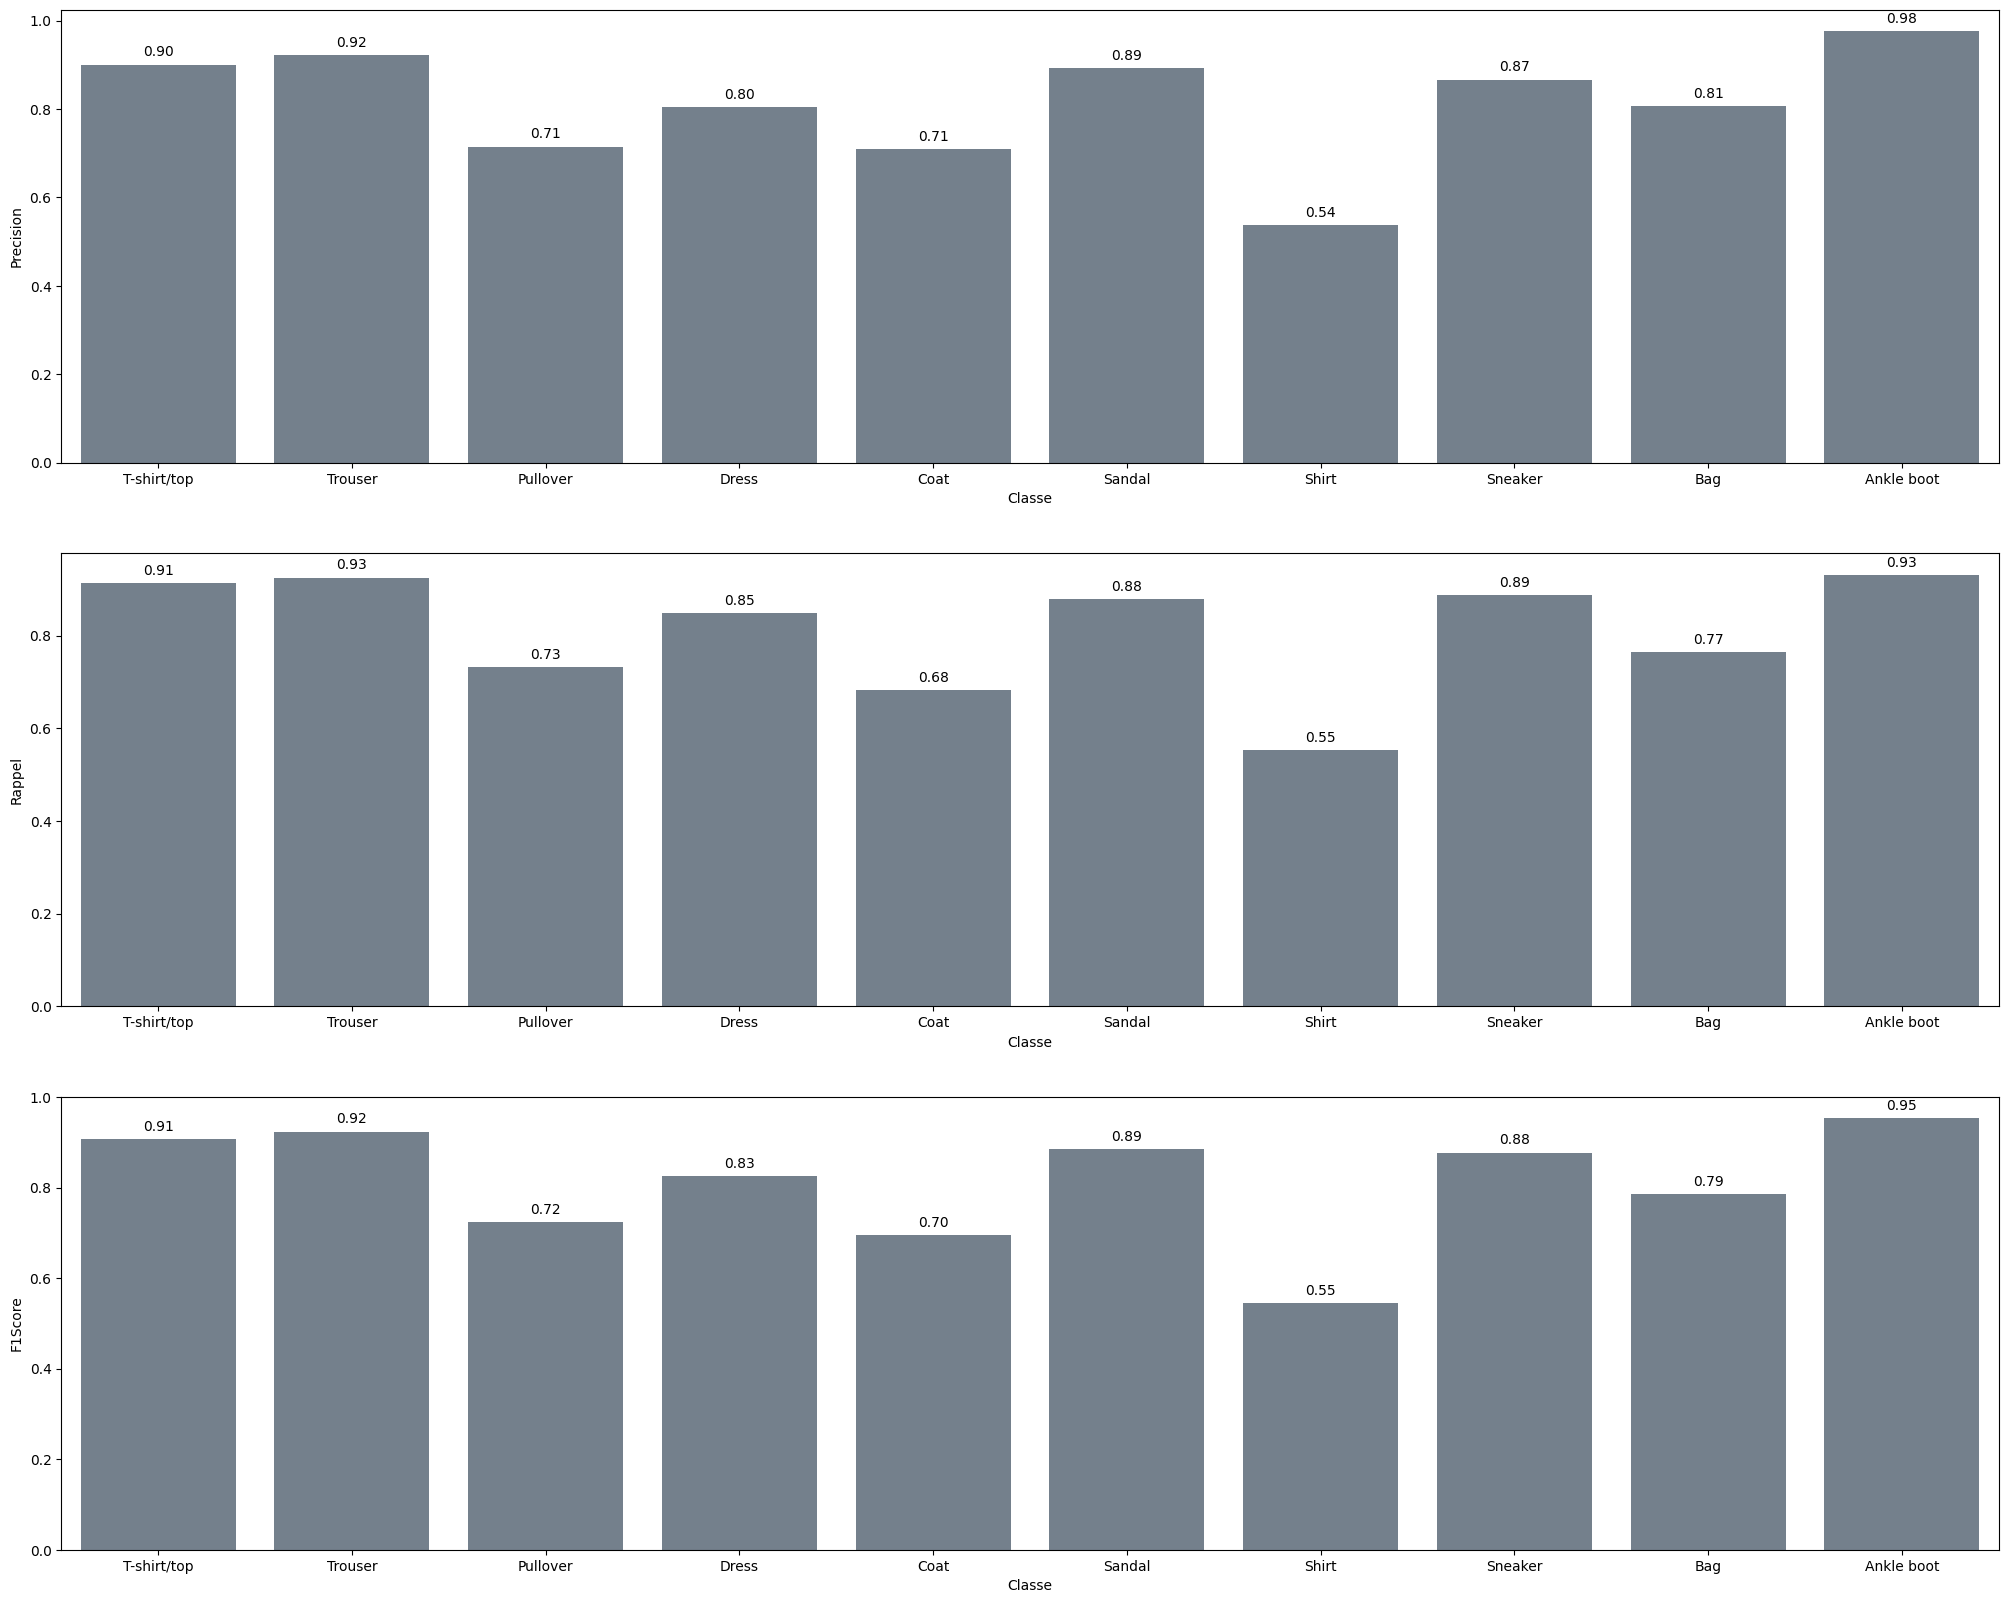

In [53]:
plot_metrics(metrics_cm)

<ipython-input-52-67a619debfcd>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_xticklabels(labels)
<ipython-input-52-67a619debfcd>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_xticklabels(labels)
<ipython-input-52-67a619debfcd>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_xticklabels(df['Classe'])


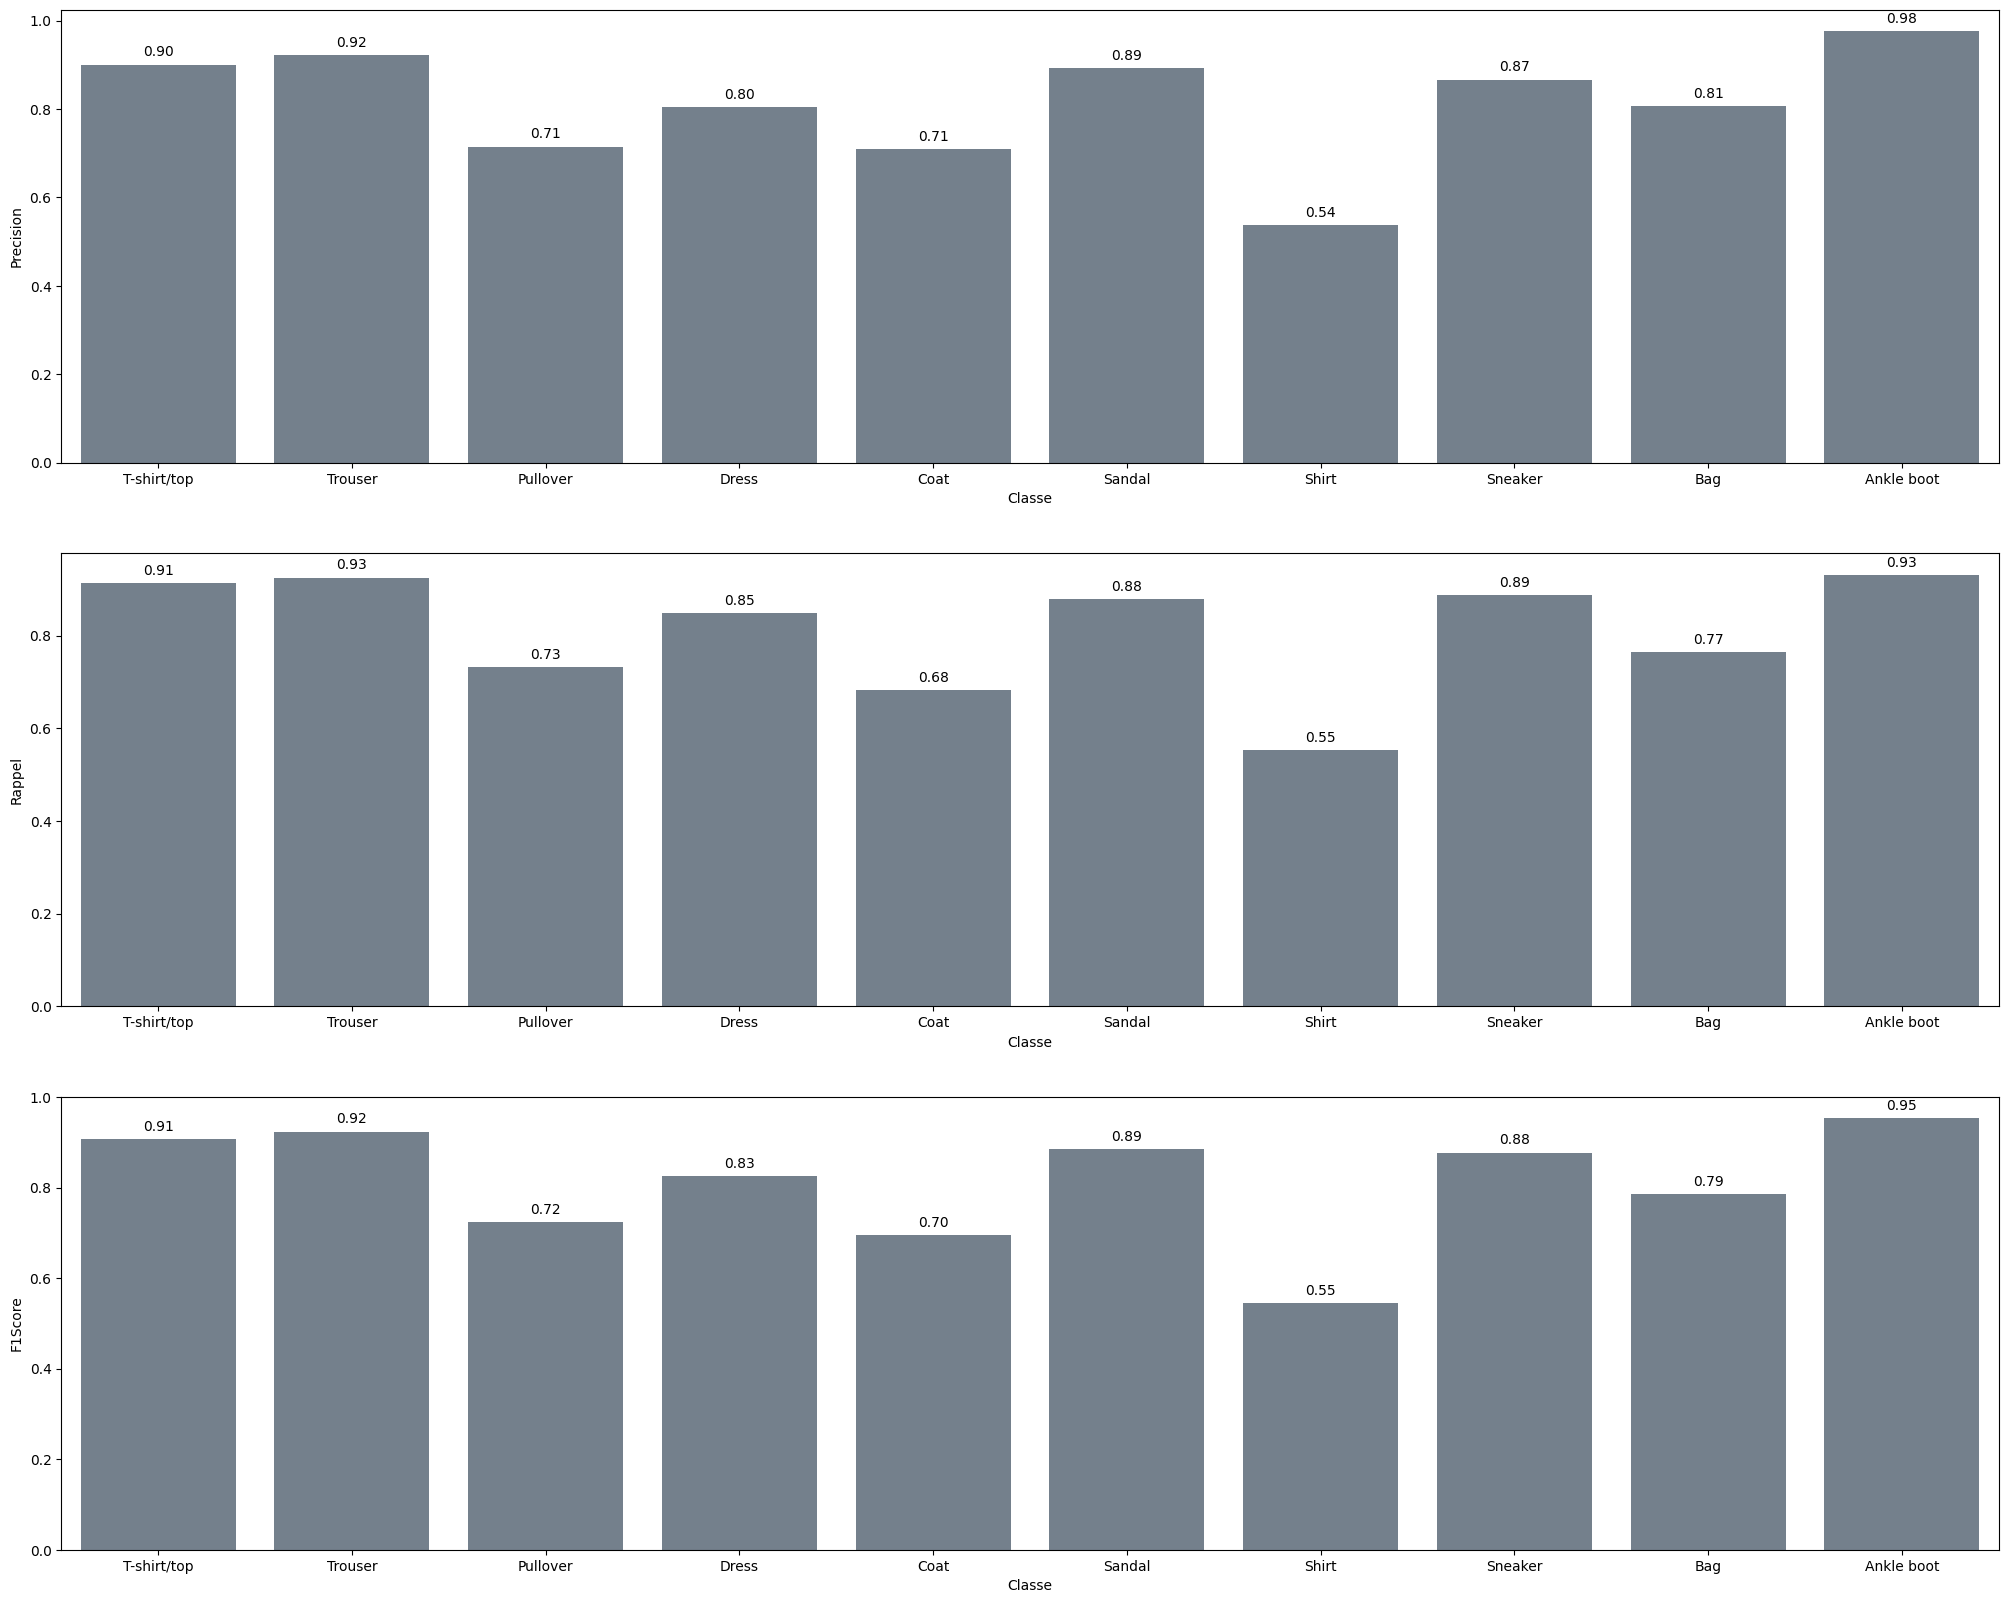

In [54]:
plot_metrics(metrics_cm2)

In [55]:
metrics_cm

,Precision,Rappel,F1Score,Classe
0,0.900394,0.913,0.906653,T-shirt/top
1,0.922233,0.925,0.923615,Trouser
2,0.714844,0.732,0.723320,Pullover
3,0.803977,0.849,0.825875,Dress
4,0.708940,0.682,0.695209,Coat
5,0.892386,0.879,0.885642,Sandal
6,0.537415,0.553,0.545096,Shirt
7,0.866341,0.888,0.877037,Sneaker
8,0.806962,0.765,0.785421,Bag
9,0.975891,0.931,0.952917,Ankle boot


In [56]:
metrics_cm2

,Precision,Rappel,F1Score,Classe
0,0.900394,0.913,0.906653,T-shirt/top
1,0.922233,0.925,0.923615,Trouser
2,0.714844,0.732,0.723320,Pullover
3,0.803977,0.849,0.825875,Dress
4,0.708940,0.682,0.695209,Coat
5,0.892386,0.879,0.885642,Sandal
6,0.537415,0.553,0.545096,Shirt
7,0.866341,0.888,0.877037,Sneaker
8,0.806962,0.765,0.785421,Bag
9,0.975891,0.931,0.952917,Ankle boot


A présent nous allons augmenter la complexité de notre modèle en ajoutant une couche caché.

In [57]:
model = Sequential()

In [58]:
model.add(Dense(units=784, activation='relu', input_shape=(Flatten_X_train.shape[1],)))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [59]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 694,950 (2.65 MB)

 Trainable params: 694,950 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [60]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [61]:
model.fit(Flatten_X_train,
          hot_y_train,
          epochs=20,
          batch_size=100)

Epoch 1/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7831 - loss: 0.6252
Epoch 2/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8680 - loss: 0.3653
Epoch 3/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8829 - loss: 0.3149
Epoch 4/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8913 - loss: 0.2932
Epoch 5/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8976 - loss: 0.2716
Epoch 6/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9015 - loss: 0.2608
Epoch 7/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9099 - loss: 0.2455
Epoch 8/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9115 - loss: 0.2361
Epoch 9/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9167 - loss: 0.2195
Epoch 10/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9172 - loss: 0.2166
Epoch 11/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9218 - loss: 0.2095
Epoch 12/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [62]:
y_pred3 = model.predict(Flatten_X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [66]:
y_pred3_labels = np.array([labels[np.argmax(i)] for i in y_pred3])

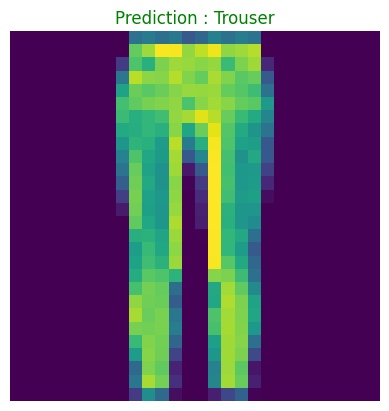

In [65]:
plt.imshow(X_test[img])
plt.axis('off')
plt.title(f"Prediction : {labels[np.argmax(y_pred3[img])]}", color='green' if np.argmax(y_pred3[img])==y_test[img] else 'red')
plt.show()

In [67]:
print(f"Test's accuracy : {100*np.sum(y_pred3_labels==y_test_labels)/len(y_pred3_labels):.3f} %")

Test's accuracy : 89.200 %


In [68]:
dump(model, 'model_relu_deep_adam_fashion_mnist_tf_neural_network.joblib')

['model_relu_deep_adam_fashion_mnist_tf_neural_network.joblib']

On observe ici un problème de surapprentissage avec pour des données de test une accuracy de 89.20% contre une accuraty de 94.29% sur les données d’entraînement.

Overfiting removing

In [69]:
from tensorflow.keras.layers import Dropout

In [72]:
model = Sequential()

In [74]:
model.add(Dense(units=784, activation='relu', input_shape=(Flatten_X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(units=100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [75]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,310,390 (5.00 MB)

 Trainable params: 1,310,390 (5.00 MB)

 Non-trainable params: 0 (0.00 B)

In [77]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [78]:
model.fit(Flatten_X_train,
          hot_y_train,
          epochs=20,
          batch_size=100)

Epoch 1/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7360 - loss: 0.7304
Epoch 2/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8565 - loss: 0.3978
Epoch 3/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8709 - loss: 0.3570
Epoch 4/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8827 - loss: 0.3211
Epoch 5/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8872 - loss: 0.3066
Epoch 6/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8928 - loss: 0.2913
Epoch 7/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8952 - loss: 0.2792
Epoch 8/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9039 - loss: 0.2619
Epoch 9/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9052 - loss: 0.2531
Epoch 10/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9080 - loss: 0.2493
Epoch 11/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9103 - loss: 0.2407
Epoch 12/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step

In [79]:
y_pred3 = model.predict(Flatten_X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [80]:
y_pred3_labels = np.array([labels[np.argmax(i)] for i in y_pred3])

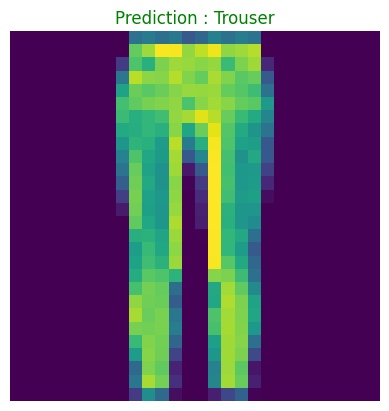

In [81]:
plt.imshow(X_test[img])
plt.axis('off')
plt.title(f"Prediction : {labels[np.argmax(y_pred3[img])]}", color='green' if np.argmax(y_pred3[img])==y_test[img] else 'red')
plt.show()

In [82]:
print(f"Test's accuracy : {100*np.sum(y_pred3_labels==y_test_labels)/len(y_pred3_labels):.3f} %")

Test's accuracy : 89.280 %


In [86]:
(f"{94.29-89.20:.3f}", f"{92.83-89.28:.3f}")

('5.090', '3.550')

On observe qu'ici l'écart entre les performances en tests sont plus proche de celle des données d'entrainement et de plus le modèle s'est amélioré

In [87]:
dump(model, 'model_relu_deep_adam_dropout_fashion_mnist_tf_neural_network.joblib')

['model_relu_deep_adam_dropout_fashion_mnist_tf_neural_network.joblib']

In [88]:
cm3 = confusion_matrix(y_test_labels, y_pred3_labels)

Text(0.5, 1.0, 'Confusion Matrix')

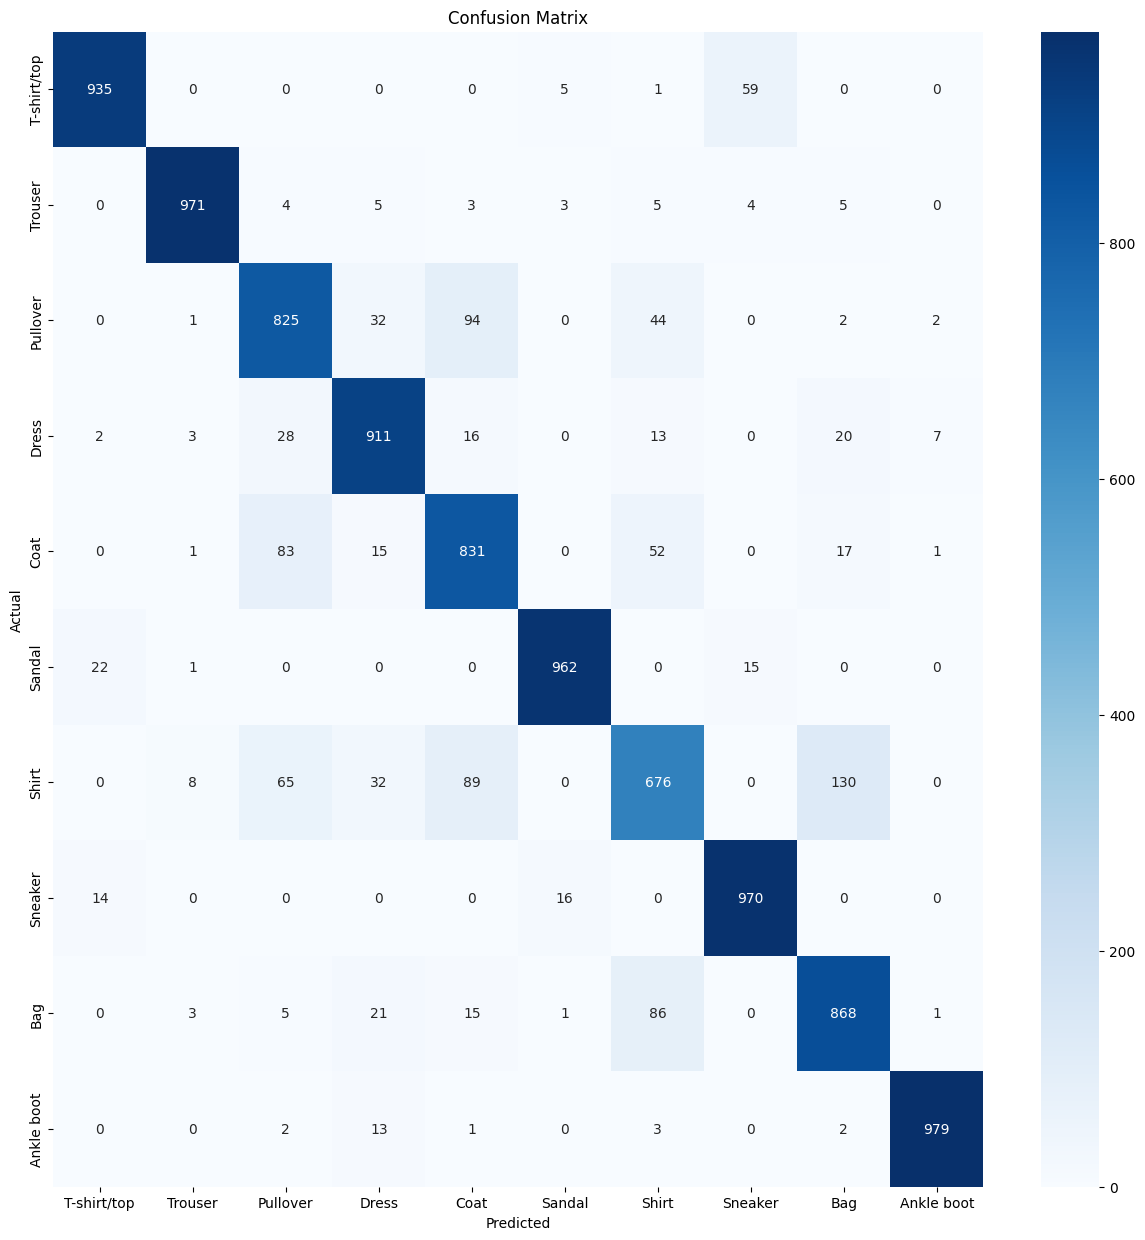

In [93]:
plt.figure(figsize=(15,15))
sns.heatmap(cm3, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [94]:
metrics_cm3=compute_metrics(cm3, labels)

In [95]:
metrics_cm3

,Precision,Rappel,F1Score,Classe
0,0.900394,0.913,0.906653,T-shirt/top
1,0.922233,0.925,0.923615,Trouser
2,0.714844,0.732,0.723320,Pullover
3,0.803977,0.849,0.825875,Dress
4,0.708940,0.682,0.695209,Coat
5,0.892386,0.879,0.885642,Sandal
6,0.537415,0.553,0.545096,Shirt
7,0.866341,0.888,0.877037,Sneaker
8,0.806962,0.765,0.785421,Bag
9,0.975891,0.931,0.952917,Ankle boot


<ipython-input-52-67a619debfcd>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_xticklabels(labels)
<ipython-input-52-67a619debfcd>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_xticklabels(labels)
<ipython-input-52-67a619debfcd>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_xticklabels(df['Classe'])


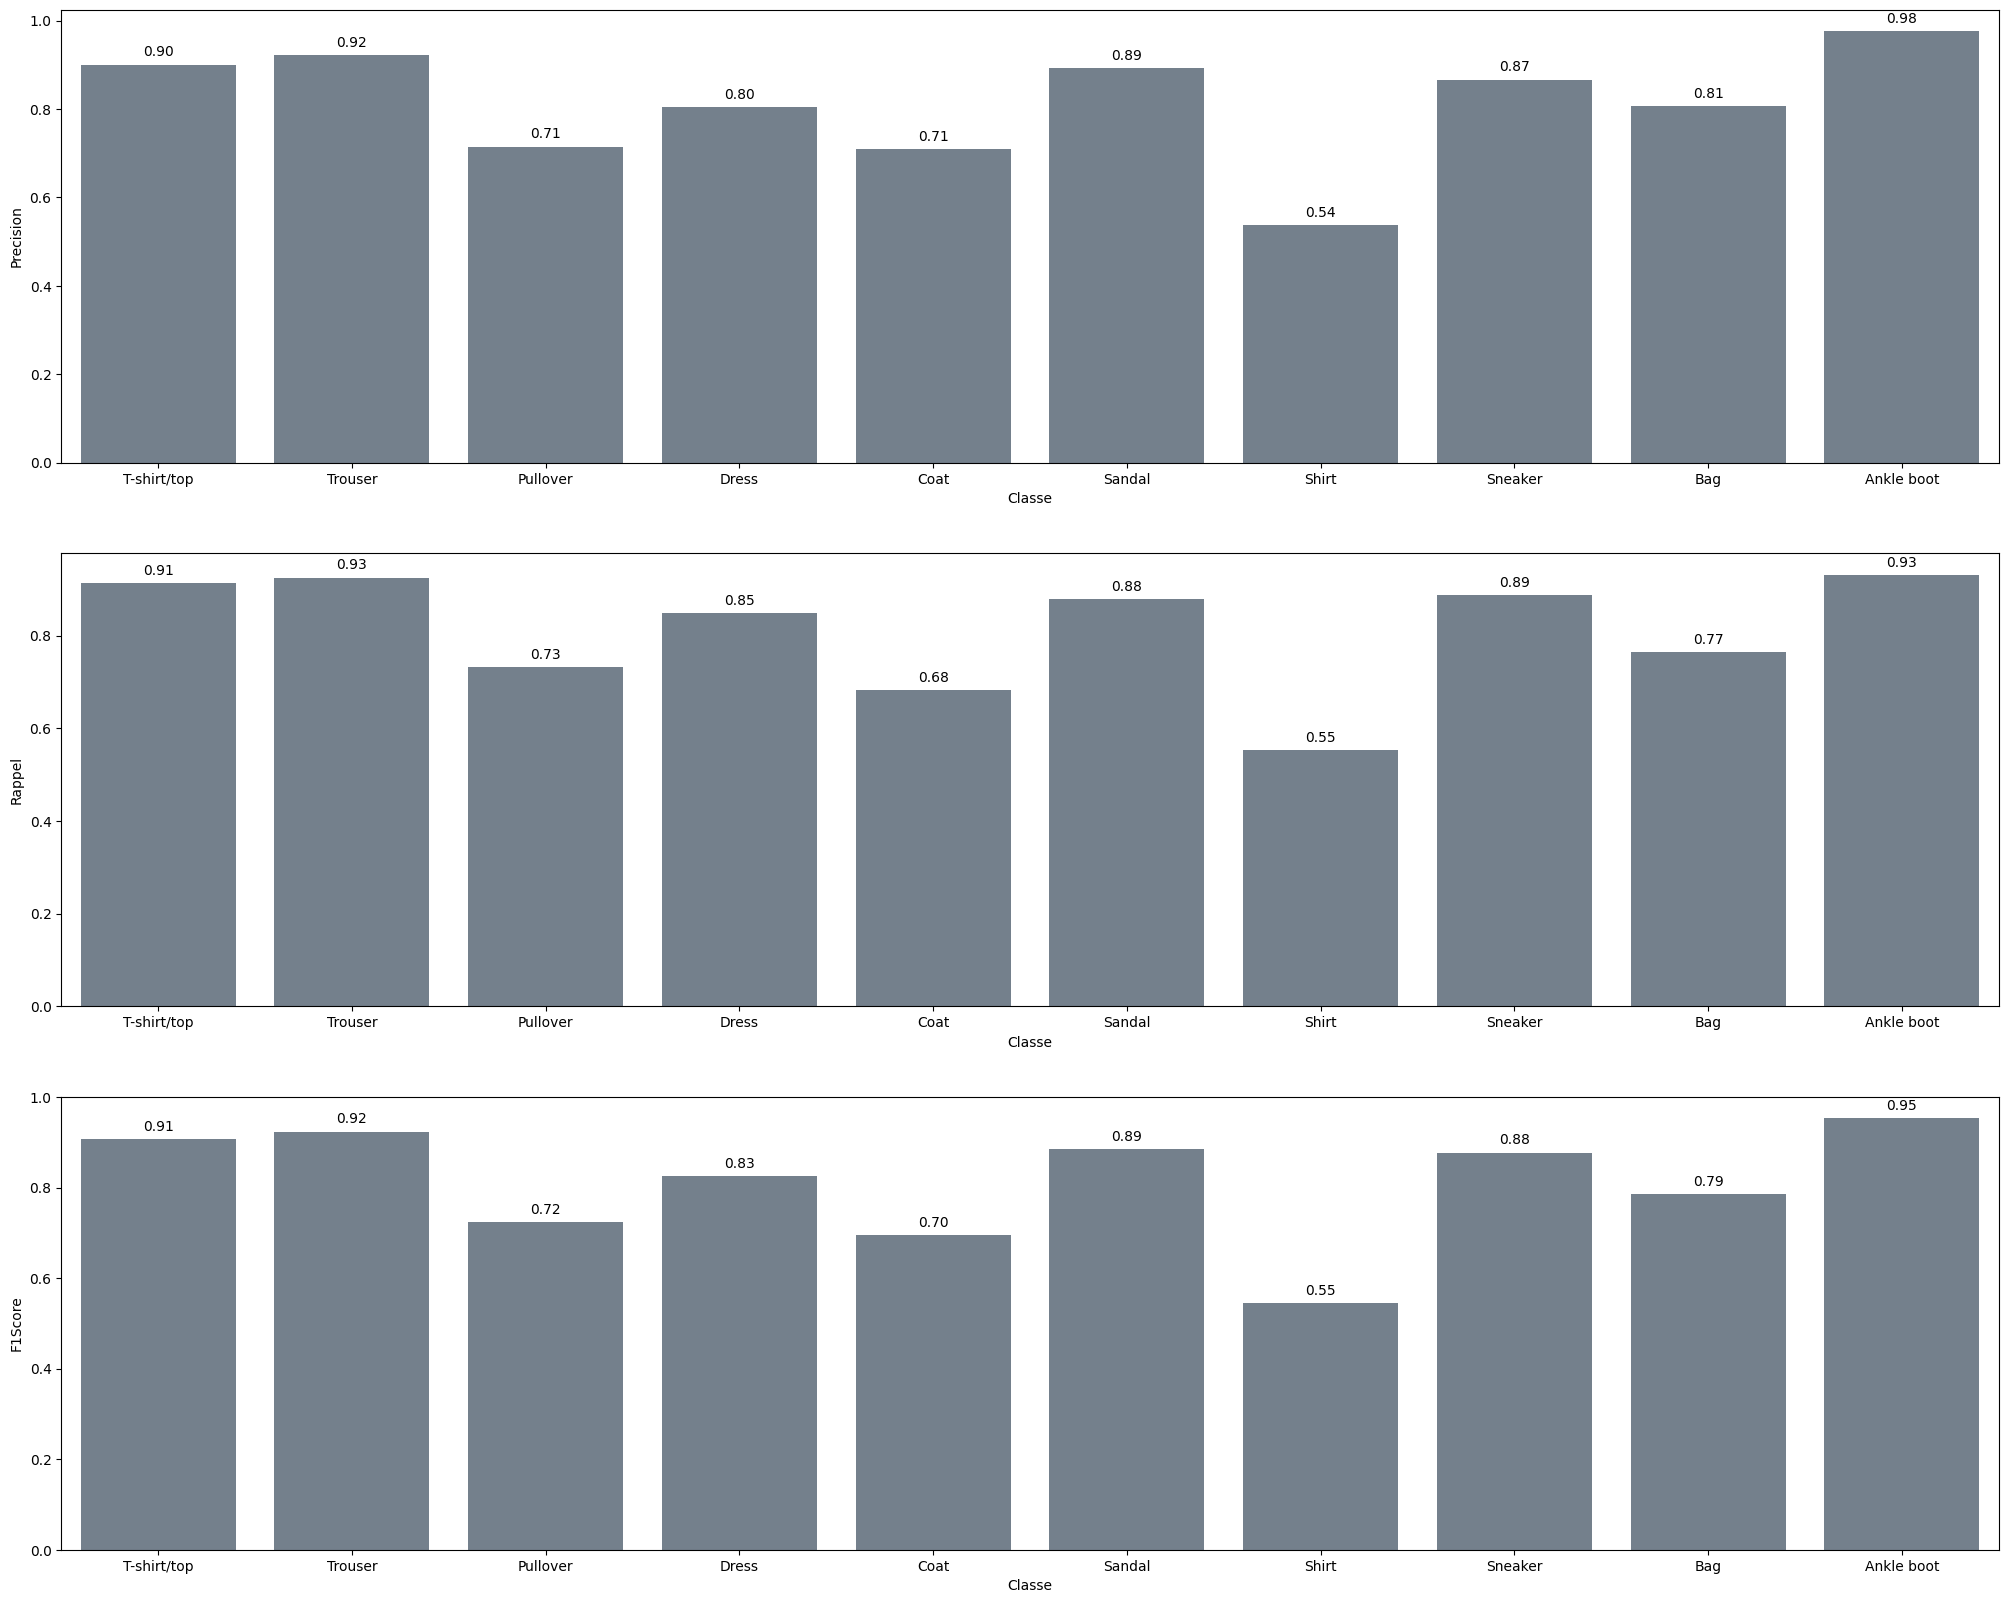

In [96]:
plot_metrics(metrics_cm3)